In [370]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

In [371]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [372]:
df = pd.read_csv('Microsoft_Stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


Data Exploration

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [374]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


Data Cleaning

In [375]:
df['Date'] = pd.to_datetime(df['Date'])

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [377]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


In [379]:
df.drop(['Open', 'High', 'Low','Volume'], axis=1,inplace=True)

In [380]:
px.line(df, title='Trend of the time series')

In [381]:
#Normalizing series
df_normalized = df.div(df.iloc[0]).mul(100)

In [382]:
px.line(df_normalized, title='Normalized series')

In [383]:
#Check for Stationarity
df_test = adfuller(df_normalized)
print('Results of Dickey-Fuller test:')
print(f'Test Statistic: {df_test[0]}')
print(f'p-value: {df_test[1]}')
print(f'Critical value: {df_test[4]}')

Results of Dickey-Fuller test:
Test Statistic: 1.737136289927099
p-value: 0.9982158366942122
Critical value: {'1%': -3.4347582315402434, '5%': -2.863486949792871, '10%': -2.567806534528638}


In [384]:
#p-value is greater than 0.05

In [385]:
df_diff = df_normalized.diff().dropna()


In [386]:
px.line(df_diff, title='Normalized series')

In [387]:
df_test = adfuller(df_diff)
print('Results of Dickey-Fuller test:')
print(f'Test Statistic: {df_test[0]}')
print(f'p-value: {df_test[1]}')
print(f'Critical value: {df_test[4]}')

Results of Dickey-Fuller test:
Test Statistic: -10.038331065146501
p-value: 1.519593991752275e-17
Critical value: {'1%': -3.43476120520139, '5%': -2.863488262178673, '10%': -2.567807233388883}


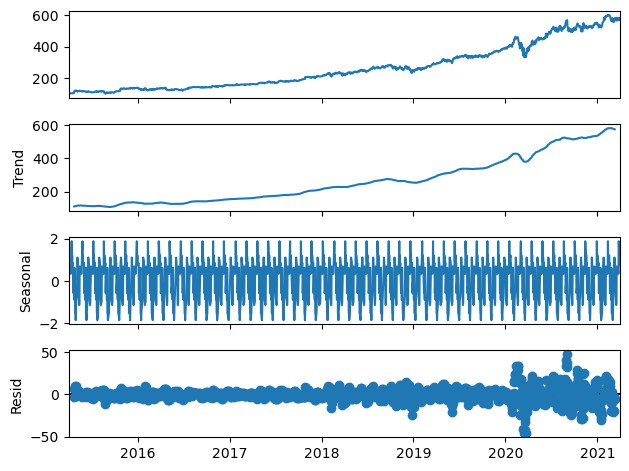

In [388]:

decomp = seasonal_decompose(df_normalized, period=30)
decomp.plot()
plt.show()

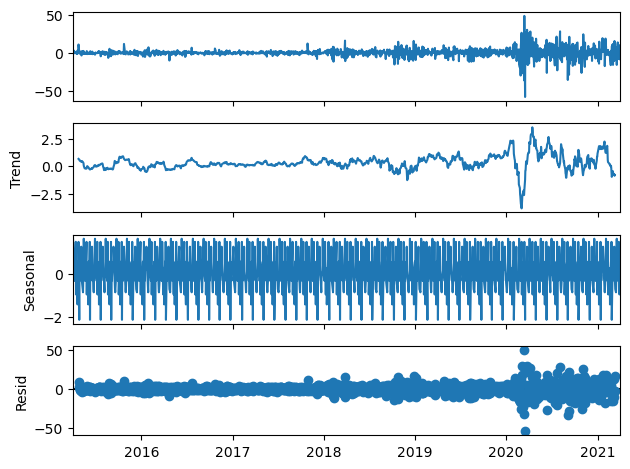

In [389]:
decomp = seasonal_decompose(df_diff, period=30)
decomp.plot()
plt.show()

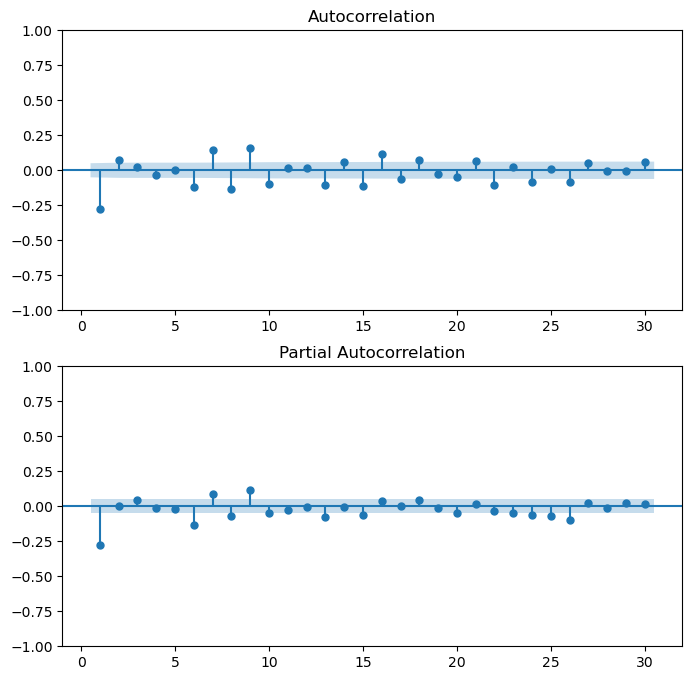

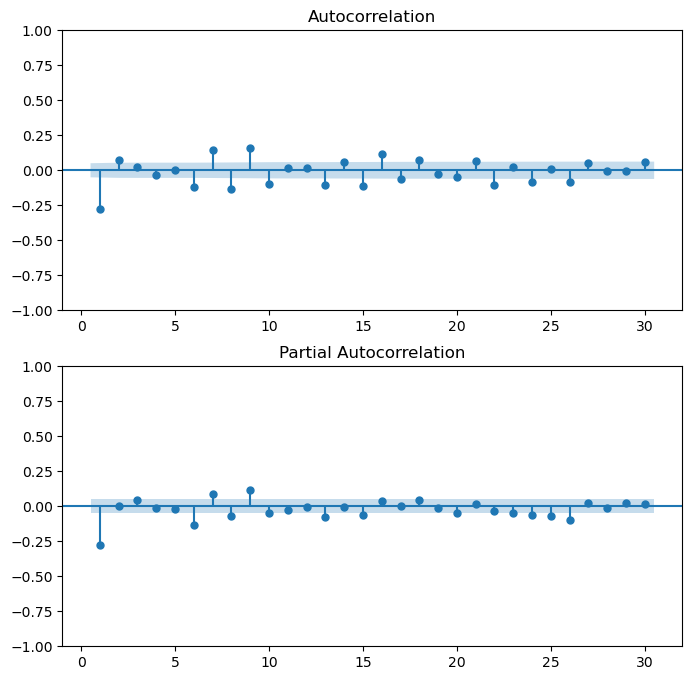

In [390]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
# ACF plot
plot_acf(df_diff, lags=30, zero=False, ax=ax1)
# PACF plot
plot_pacf(df_diff, lags=30, zero=False, ax=ax2)

AUTO-ARIMA

In [391]:
stepwise_model = pm.auto_arima(df_normalized, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.02 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10522.728, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=10088.786, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.62 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=10439.486, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=9846.055, Time=0.88 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.42 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.00 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9951.694, Time=0.99 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=9847.011, Time=1.60 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=9847.299, Time=1.80 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=9858.416, Time=1.06 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=9848.342, Time=2.47 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=9848.049, Time=3.73 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12

In [392]:
stepwise_model = pm.auto_arima(df_normalized, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9475.702, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9590.107, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9473.706, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9484.060, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9592.641, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9475.700, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9477.417, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=9479.584, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.619 seconds
9473.706289518293


In [393]:
stepwise_model = pm.auto_arima(df_diff, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.68 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10524.727, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=10090.785, Time=1.02 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.94 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10522.728, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=10441.486, Time=0.18 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=9848.048, Time=3.56 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.63 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.98 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=9953.691, Time=2.28 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=9849.004, Time=4.89 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=9849.292, Time=4.48 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=9860.409, Time=1.95 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=9850.336, Time=9.26 sec
 ARIMA(1,0,0)(2,1,0)[12]           

/Users/magdad/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/magdad/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



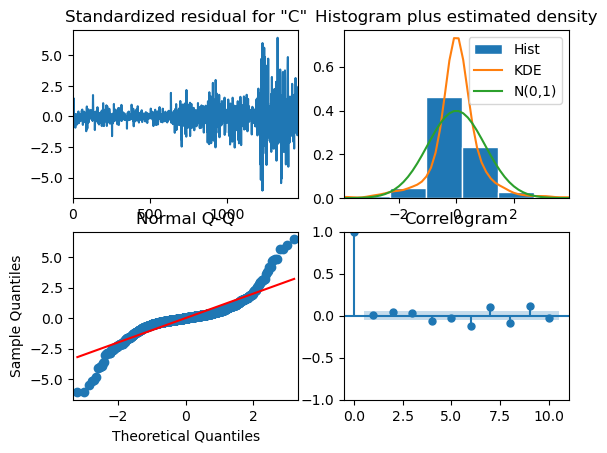

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1481
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -4788.942
Date:                            Sun, 14 Jan 2024   AIC                           9585.885
Time:                                    23:13:23   BIC                           9607.051
Sample:                                         0   HQIC                          9593.779
                                           - 1481                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2706      0.012    -23.312      0.000      -0.293      -0.248
ar.S.L12      -0.6432      0.011   

/Users/magdad/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



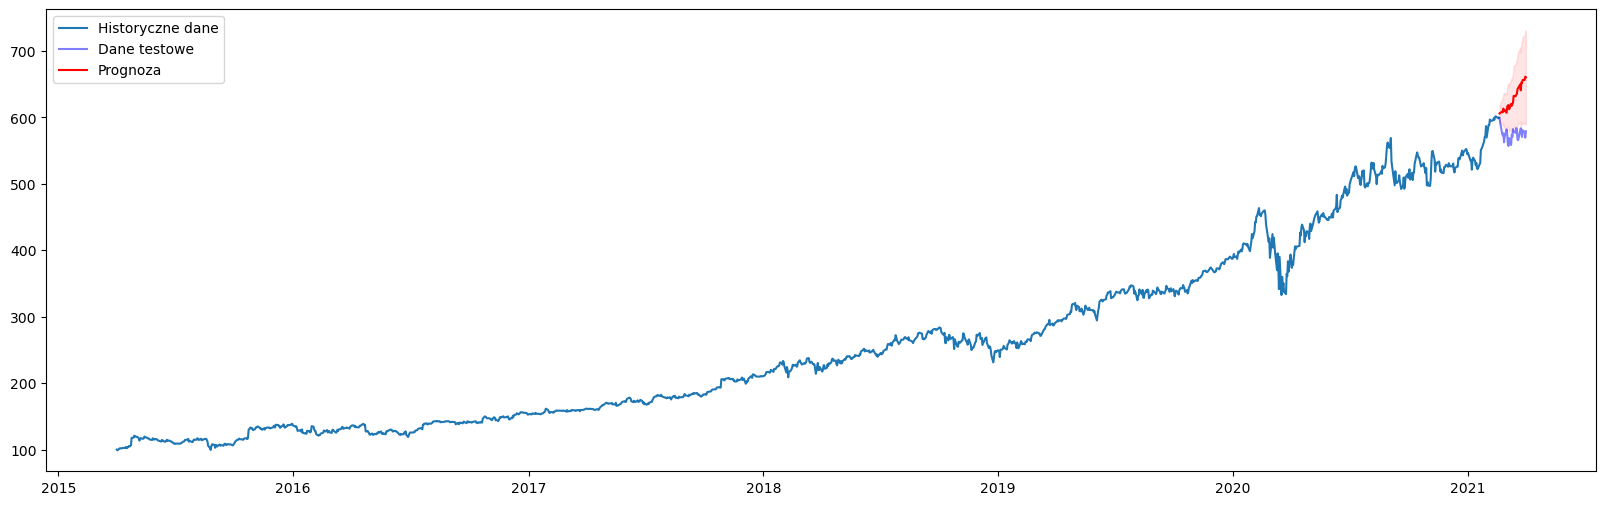

In [394]:

data = df_normalized.iloc[:-30]

# Model ARIMA(1,1,0)(2,1,0)[12]
order = (1, 1, 0)  # (p, d, q)
seasonal_order = (2, 1, 0, 12)  # (P, D, Q, s)

model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
results = model.fit(disp=False)

results.plot_diagnostics()
plt.show()

print(results.summary())

forecast_steps = 30 
forecast = results.get_forecast(steps=forecast_steps)

forecast_index = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
plt.figure(figsize=(20, 6))
plt.plot(data, label='Historyczne dane')
plt.plot(df_normalized.tail(30), color='b', alpha=0.5, label='Dane testowe')
plt.plot(forecast_index, forecast_mean, color='red', label='Prognoza')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.1)
plt.legend()
plt.show()

/Users/magdad/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/magdad/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



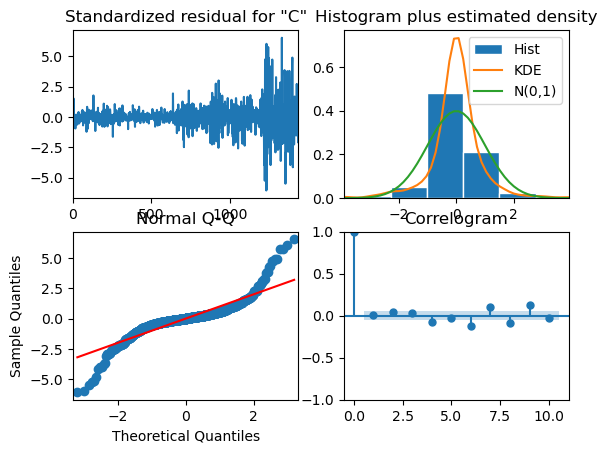

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1451
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -4677.093
Date:                            Sun, 14 Jan 2024   AIC                           9362.185
Time:                                    23:13:35   BIC                           9383.269
Sample:                                         0   HQIC                          9370.056
                                           - 1451                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2761      0.012    -23.834      0.000      -0.299      -0.253
ar.S.L12      -0.6247      0.011   

/Users/magdad/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



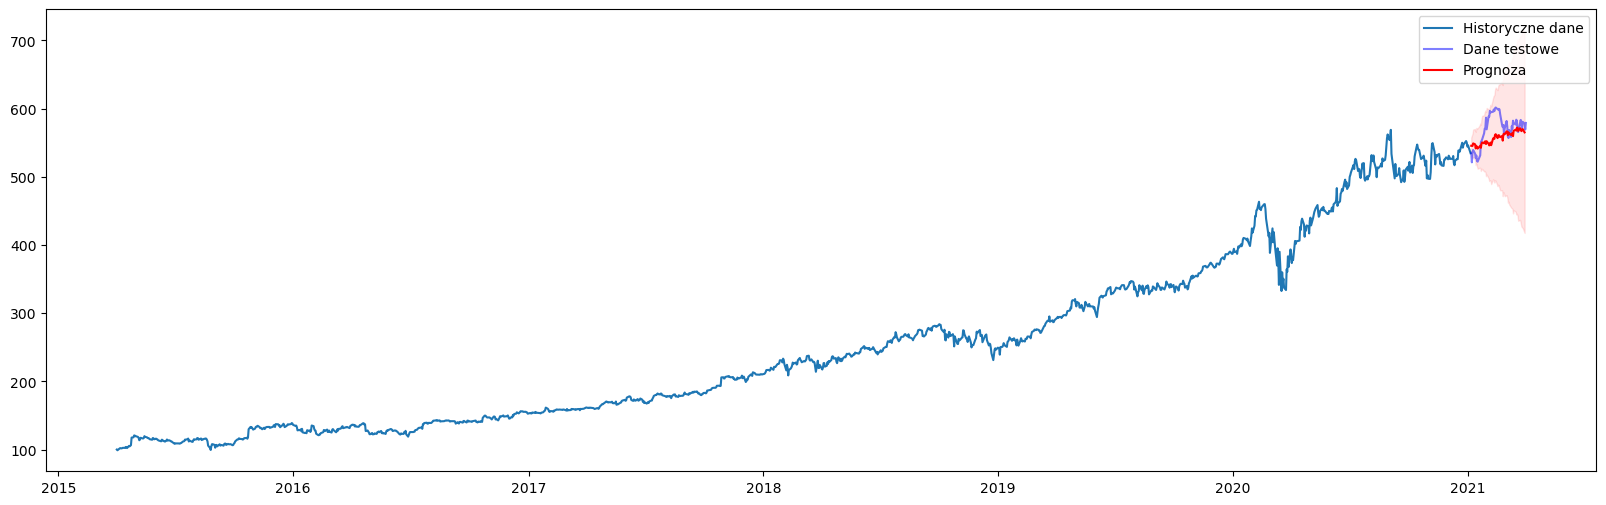

In [395]:
data = df_normalized.iloc[:-60]

# Model ARIMA(1,1,0)(2,1,0)[12]
order = (1, 1, 0)  # (p, d, q)
seasonal_order = (2, 1, 0, 12)  # (P, D, Q, s)

model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
results = model.fit(disp=False)

results.plot_diagnostics()
plt.show()

print(results.summary())

forecast_steps = 60 
forecast = results.get_forecast(steps=forecast_steps)

forecast_index = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
plt.figure(figsize=(20, 6))
plt.plot(data, label='Historyczne dane')
plt.plot(df_normalized.tail(60), color='b', alpha=0.5, label='Dane testowe')
plt.plot(forecast_index, forecast_mean, color='red', label='Prognoza')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.1)
plt.legend()
plt.show()

/Users/magdad/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/magdad/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



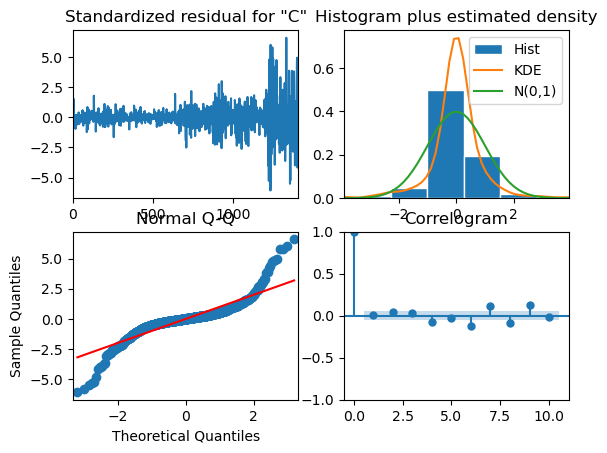

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1421
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -4573.890
Date:                            Sun, 14 Jan 2024   AIC                           9155.780
Time:                                    23:13:58   BIC                           9176.780
Sample:                                         0   HQIC                          9163.628
                                           - 1421                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2859      0.012    -24.591      0.000      -0.309      -0.263
ar.S.L12      -0.6163      0.011   

/Users/magdad/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



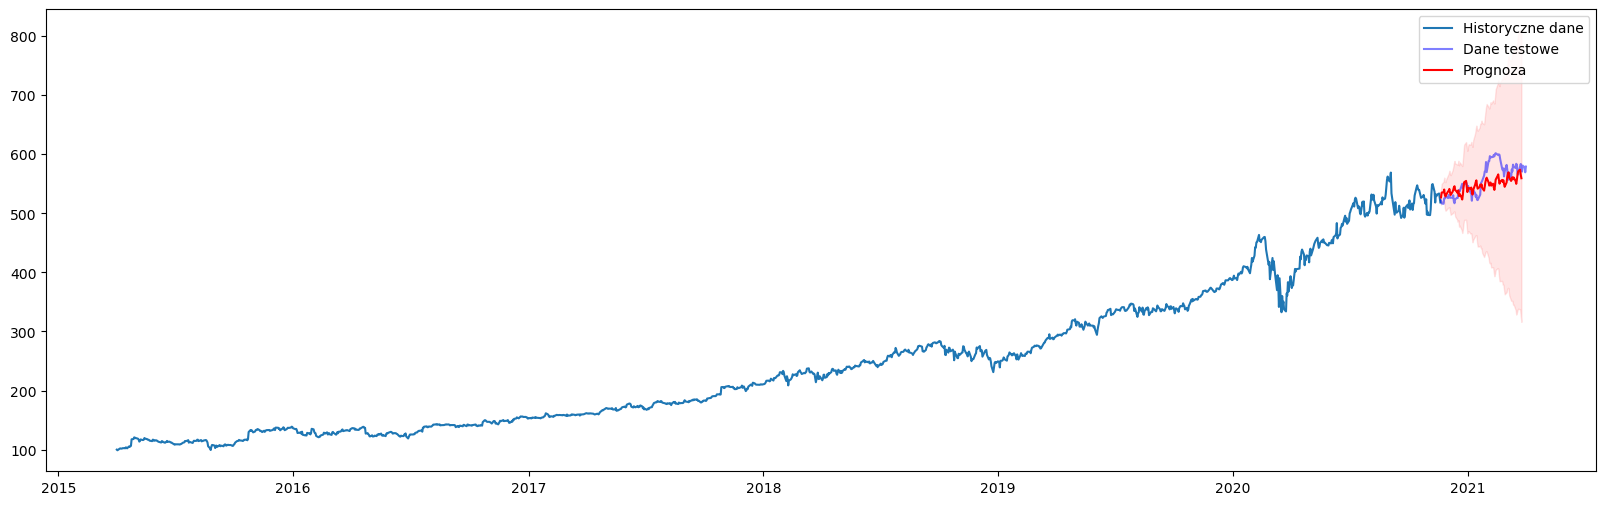

In [396]:
data = df_normalized.iloc[:-90]

# Model ARIMA(1,1,0)(2,1,0)[12]
order = (1, 1, 0)  # (p, d, q)
seasonal_order = (2, 1, 0, 12)  # (P, D, Q, s)

model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
results = model.fit(disp=False)

results.plot_diagnostics()
plt.show()

print(results.summary())

forecast_steps = 90 
forecast = results.get_forecast(steps=forecast_steps)

forecast_index = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
plt.figure(figsize=(20, 6))
plt.plot(data, label='Historyczne dane')
plt.plot(df_normalized.tail(90), color='b', alpha=0.5, label='Dane testowe')
plt.plot(forecast_index, forecast_mean, color='red', label='Prognoza')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.1)
plt.legend()
plt.show()